Loading the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Set2')

In [7]:
import pandas as pd

# Try reading the CSV file with different encodings
encodings_to_try = ['utf-8', 'ISO-8859-1', 'cp1252']
file_path = 'spam.csv'

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        # If successful, break out of the loop
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding '{encoding}'")

# Display the first few rows of the DataFrame
df.head()

Failed to read with encoding 'utf-8'


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
#removing unwanted columns and renaming the columns
df = df[["v1","v2"]]
df.rename(columns={"v1":"label","v2":"text"},inplace=True)

In [9]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


EDA


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.label.value_counts()


label
ham     4516
spam     653
Name: count, dtype: int64

Visualizations

<Axes: xlabel='label', ylabel='count'>

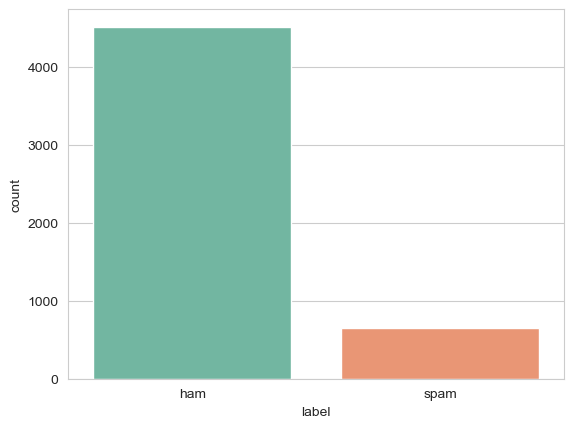

In [15]:
sns.barplot(x=df.label.value_counts().index,y=df.label.value_counts())

In [16]:
sns.histplot(df["text"].apply(len),bins=100

SyntaxError: incomplete input (1075201640.py, line 1)

<Axes: xlabel='text', ylabel='Count'>

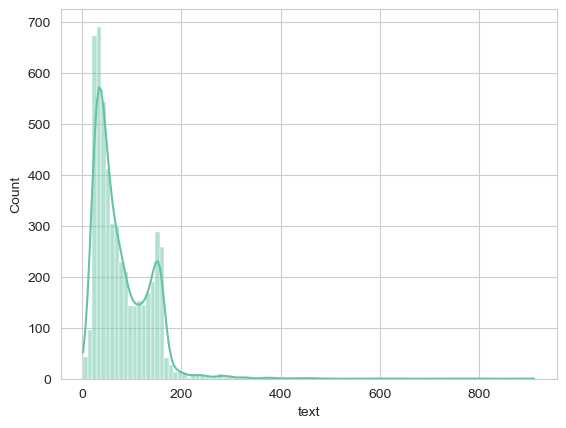

In [17]:
sns.histplot(df["text"].apply(len),bins=100,kde=True)

<Axes: title={'center': 'Average Number of Sentences'}, xlabel='type', ylabel='sentences'>

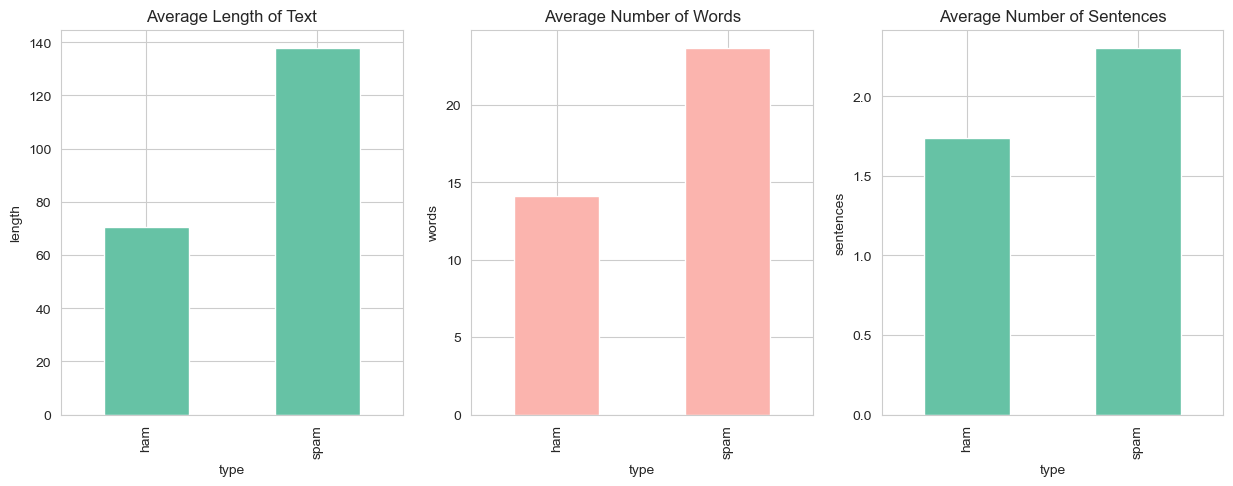

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

df.groupby("label").apply(lambda x: x["text"].apply(len).mean()).plot(
    kind="bar", ax=ax1, title="Average Length of Text",xlabel="type",ylabel="length")

df.groupby("label").apply(lambda x: x["text"].apply(lambda x: len(
    x.split())).mean()).plot(kind="bar", ax=ax2, title="Average Number of Words",xlabel="type",ylabel="words",colormap="Pastel1")

df.groupby("label").apply(lambda x: x["text"].apply(lambda x: len(x.split(
    ". "))).mean()).plot(kind="bar", ax=ax3, title="Average Number of Sentences",xlabel="type",ylabel="sentences")

Clearly Spam avg length is nearly double of ham

Clearly Spam avg number of words is nearly double of ham

Clearly Spam avg sentence count is greater than of ham

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
pip install wordcloud


   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ------------------------------- -------- 235.5/300.0 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


(-0.5, 799.5, 511.5, -0.5)

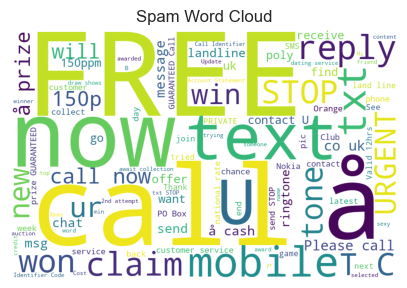

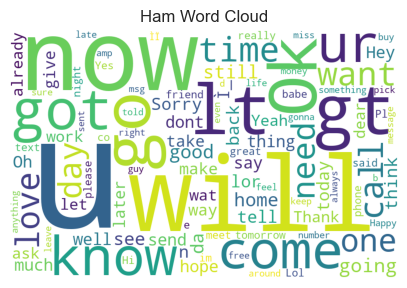

In [24]:
from wordcloud import WordCloud

spam_words = ' '.join(list(df[df['label'] == 'spam']['text']))
spam_wc = WordCloud(width = 800,height = 512,max_words=100,background_color="white").generate(spam_words)

plt.figure(figsize = (5, 6))
plt.title('Spam Word Cloud')
plt.imshow(spam_wc)
plt.axis('off')


ham_words = ' '.join(list(df[df['label'] == 'ham']['text']))
ham_wc = WordCloud(width = 800,height = 512,max_words=100,background_color="white").generate(ham_words)

plt.figure(figsize = (5, 6))
plt.title('Ham Word Cloud')
plt.imshow(ham_wc)
plt.axis('off')

Preprocessing

In [25]:
df["text"].sample(5)

1456    U sleeping now.. Or you going to take? Haha.. ...
1306    Enjoy the jamster videosound gold club with yo...
567     So anyways, you can just go to your gym or wha...
4141    Infact happy new year. How are you where are y...
1873    You have WON a guaranteed å£1000 cash or a å£2...
Name: text, dtype: object

In [29]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [30]:
import nltk

In [31]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zahid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
import nltk

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zahid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
import re
import string
import nltk

nltk.download('stopwords')  # Add this line to download the stopwords dataset

from nltk.corpus import stopwords

stopwd = stopwords.words('english')

def clean_text(text):
    text = text.lower()  # Lowercasing the text
    text = re.sub('-', ' ', text.lower())  # Replacing `x-x` as `x x`
    text = re.sub(r'http\S+', '', text)  # Removing Links
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuations
    text = re.sub(r'\s+', ' ', text)  # Removing unnecessary spaces
    text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Removing single characters

    words = nltk.tokenize.word_tokenize(text, language="english", preserve_line=True)
    text = " ".join([i for i in words if i not in stopwd and len(i) > 2])  # Removing the stop words

    return text.strip()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zahid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
df["clean_text"] = df["text"].apply(clean_text)

In [37]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts 21st m...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


Splitting the Data

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135,), (1034,), (4135,), (1034,))

In [40]:
X_train.head()

2228                                     exact intentions
5529                                                  one
2149                              waaaat lololo next time
5058    free video camera phones half price line renta...
5051    tick tick tick could die loneliness know pouts...
Name: clean_text, dtype: object

Vectorizing

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = CountVectorizer(stop_words='english',lowercase=True)
# vectorizer = TfidfVectorizer(stop_words='english',max_features=10000,ngram_range=(1,3),lowercase=True)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [42]:
X_train_vectorized.shape, X_test_vectorized.shape

((4135, 7753), (1034, 7753))

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

<Axes: xlabel='0'>

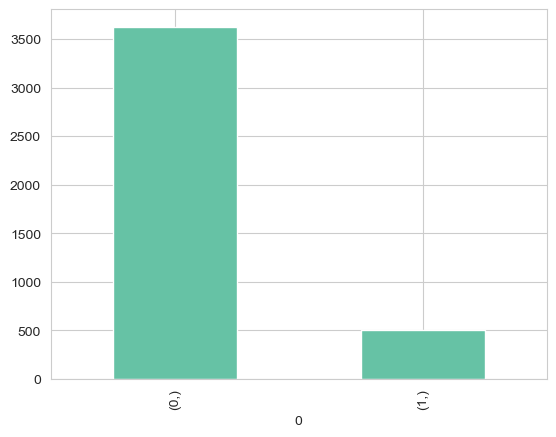

In [44]:
pd.DataFrame(y_train).value_counts().plot(kind="bar")

Balancing both the classes using the RandomOverSampler

In [47]:
pip install imbalanced-learn


   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   -------------------- ------------------- 122.9/235.6 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
from imblearn.over_sampling import RandomOverSampler


In [50]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)
# We will pass to it the output of Vectorizer from train data
x_train_resampled, y_train_resampled = sampler.fit_resample(
    X_train_vectorized, y_train)

<Axes: xlabel='0'>

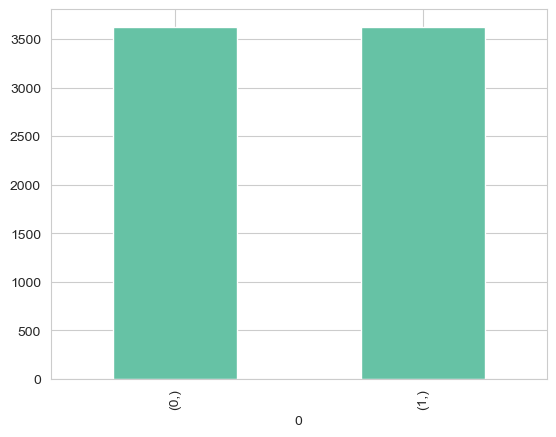

In [51]:
pd.DataFrame(y_train_resampled).value_counts().plot(kind="bar")

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

Modelling

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000,solver="sag",tol=0.001,max_iter=500,random_state=15)
lr.fit(x_train_resampled,y_train_resampled)

LogisticRegression(C=1000, max_iter=500, random_state=15, solver='sag',
                   tol=0.001)

In [54]:
print("Train Accuracy: ", lr.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", lr.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, lr.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, lr.predict(X_test_vectorized)))

Train Accuracy:  1.0
Test Accuracy:  0.9806576402321083
Train Precision:  1.0
Test Precision:  0.9844961240310077


In [55]:
from sklearn.naive_bayes import MultinomialNB

cnb = MultinomialNB(alpha=0.1)
cnb.fit(x_train_resampled,y_train_resampled)

MultinomialNB(alpha=0.1)

In [56]:
print("Train Accuracy: ", cnb.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", cnb.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, cnb.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, cnb.predict(X_test_vectorized)))

Train Accuracy:  0.9896608767576509
Test Accuracy:  0.9642166344294004
Train Precision:  0.9860426929392446
Test Precision:  0.8461538461538461


In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

In [58]:
print("Train Accuracy: ", rf.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", rf.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, rf.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, rf.predict(X_test_vectorized)))

Train Accuracy:  1.0
Test Accuracy:  0.9748549323017408
Train Precision:  1.0
Test Precision:  1.0


In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [60]:
print("Train Accuracy: ", dt.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", dt.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, dt.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, dt.predict(X_test_vectorized)))

Train Accuracy:  1.0
Test Accuracy:  0.9593810444874274
Train Precision:  1.0
Test Precision:  0.8456375838926175


In [61]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(x_train_resampled,y_train_resampled)

SVC(random_state=42)

In [62]:
print("Train Accuracy: ", svc.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", svc.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, svc.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, svc.predict(X_test_vectorized)))

Train Accuracy:  1.0
Test Accuracy:  0.9806576402321083
Train Precision:  1.0
Test Precision:  0.9921259842519685


In [64]:
pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 6.3 MB/s eta 0:00:16
   ---------------------------------------- 0.6/99.8 MB 7.9 MB/s eta 0:00:13
   ---------------------------------------- 1.2/99.8 MB 9.6 MB/s eta 0:00:11
    --------------------------------------- 1.6/99.8 MB 9.5 MB/s eta 0:00:11
    --------------------------------------- 2.2/99.8 MB 10.2 MB/s eta 0:00:10
   - -------------------------------------- 2.8/99.8 MB 10.4 MB/s eta 0:00:10
   - -------------------------------------- 3.3/99.8 MB 10.6 MB/s eta 0:00:10
   - -------------------------------------- 3.8/99.8 MB 10.5 MB/s eta 0:00:10
   - -------------------------------------- 3.9/99.8 MB 9.6 MB/s eta 0:00:10
   - -------------------------------------- 4.5/99.8 MB 9.8 MB/s eta 0:00:10
   - -------------------------------------- 4.7/99.8 MB 9.4 MB/s eta 0:00:11
   -- ------------------------------------- 5.1/99.8 MB 9.3 MB/s eta 0:00:11
  

In [65]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.7,max_depth=7,n_estimators=200)
xgb.fit(x_train_resampled,y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
print("Train Accuracy: ", xgb.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", xgb.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, xgb.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, xgb.predict(X_test_vectorized)))

Train Accuracy:  0.9984835952577888
Test Accuracy:  0.9671179883945842
Train Precision:  0.9994475138121547
Test Precision:  0.9051094890510949


In [68]:
pip install lightgbm


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.3 MB 5.8 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.3 MB 5.6 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.3 MB 6.1 MB/s eta 0:00:01
   --------------------------------- ------ 1.1/1.3 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [69]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [70]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train_resampled.toarray(),y_train_resampled)

[LightGBM] [Info] Number of positive: 3627, number of negative: 3627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1631
[LightGBM] [Info] Number of data points in the train set: 7254, number of used features: 686
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [71]:
print("Train Accuracy: ", lgbm.score(x_train_resampled.toarray(), y_train_resampled))
print("Test Accuracy: ", lgbm.score(X_test_vectorized.toarray(), y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, lgbm.predict(x_train_resampled.toarray())))
print("Test Precision: ", precision_score(y_test, lgbm.predict(X_test_vectorized.toarray())))


Train Accuracy:  0.9926936862420733
Test Accuracy:  0.9690522243713733
Train Precision:  0.9969410456062291
Test Precision:  0.8896551724137931


Scores

In [72]:
y_pred_train_lr = lr.predict(x_train_resampled)
y_pred_test_lr = lr.predict(X_test_vectorized)

y_pred_train_cnb = cnb.predict(x_train_resampled)
y_pred_test_cnb = cnb.predict(X_test_vectorized)

y_pred_train_rf = rf.predict(x_train_resampled)
y_pred_test_rf = rf.predict(X_test_vectorized)

y_pred_train_dt = dt.predict(x_train_resampled)
y_pred_test_dt = dt.predict(X_test_vectorized)

y_pred_train_svc = svc.predict(x_train_resampled)
y_pred_test_svc = svc.predict(X_test_vectorized)

y_pred_train_xgb = xgb.predict(x_train_resampled)
y_pred_test_xgb = xgb.predict(X_test_vectorized)

y_pred_train_lgbm = lgbm.predict(x_train_resampled.toarray())
y_pred_test_lgbm = lgbm.predict(X_test_vectorized.toarray())

In [75]:
from sklearn.metrics import roc_auc_score,roc_curve

modelsdict = {"LR":lr,"CNB":cnb,"RF":rf,"DT":dt,"SVC":svc,"XGB":xgb,"LGBM":lgbm}

scoresdict = {}

for key,value in modelsdict.items():

    Train_ACC=accuracy_score(y_train_resampled,value.predict(x_train_resampled.toarray()))
    Train_Prec=precision_score(y_train_resampled,value.predict(x_train_resampled.toarray()))
    Test_ACC=accuracy_score(y_test,value.predict(X_test_vectorized.toarray()))
    Test_Prec=precision_score(y_test,value.predict(X_test_vectorized.toarray()))

    scoresdict[key] = [Train_ACC,Train_Prec,Test_ACC,Test_Prec]

scoresdf = pd.DataFrame(scoresdict,index=["Train_ACC","Train_Prec","Test_ACC","Test_Prec"]).T

In [76]:
scoresdf.sort_values(by="Test_ACC",ascending=False)

,Train_ACC,Train_Prec,Test_ACC,Test_Prec
LR,1.000000,1.000000,0.980658,0.984496
SVC,1.000000,1.000000,0.980658,0.992126
RF,1.000000,1.000000,0.974855,1.000000
LGBM,0.992694,0.996941,0.969052,0.889655
CNB,0.989661,0.986043,0.964217,0.846154
DT,1.000000,1.000000,0.959381,0.845638
XGB,0.500000,0.500000,0.140232,0.140232


In [77]:
scoresdf.sort_values(by="Test_Prec",ascending=False)

,Train_ACC,Train_Prec,Test_ACC,Test_Prec
RF,1.000000,1.000000,0.974855,1.000000
SVC,1.000000,1.000000,0.980658,0.992126
LR,1.000000,1.000000,0.980658,0.984496
LGBM,0.992694,0.996941,0.969052,0.889655
CNB,0.989661,0.986043,0.964217,0.846154
DT,1.000000,1.000000,0.959381,0.845638
XGB,0.500000,0.500000,0.140232,0.140232


<Axes: title={'center': 'Accuracy and Precision Scores'}, xlabel='Models', ylabel='Accuracy'>

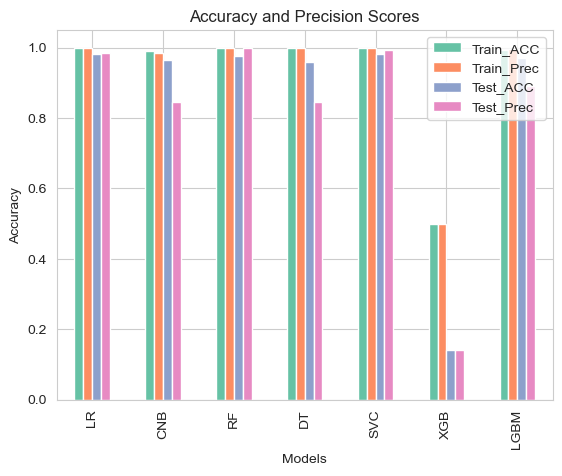

In [78]:
scoresdf.plot(kind="bar",title="Accuracy and Precision Scores",xlabel="Models",ylabel="Accuracy")

Roc Curve

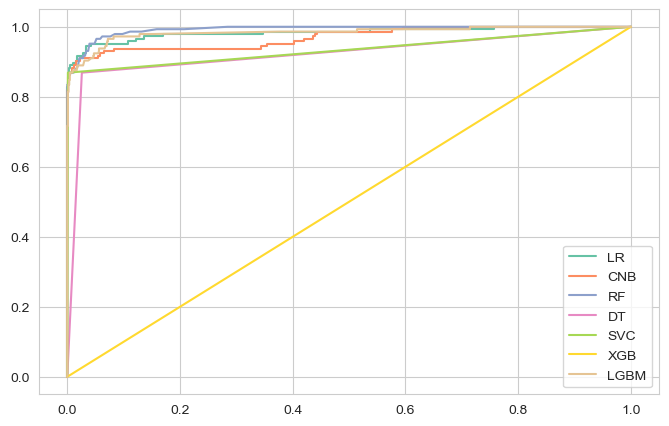

In [79]:
plt.figure(figsize=(8,5))

for key,value in modelsdict.items():
    try:
        fpr,tpr,thresholds = roc_curve(y_test,value.predict_proba(X_test_vectorized.toarray())[:,1])
    except:
        fpr,tpr,thresholds = roc_curve(y_test,value.predict(X_test_vectorized.toarray()))
    plt.plot(fpr,tpr,label=key)
plt.legend()

Text(0.5, 1.0, 'LightGBM')

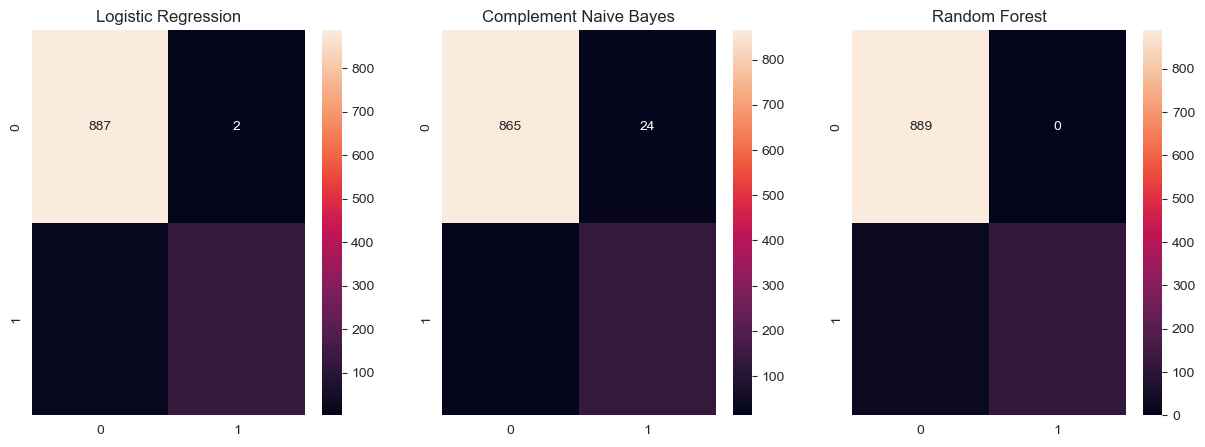

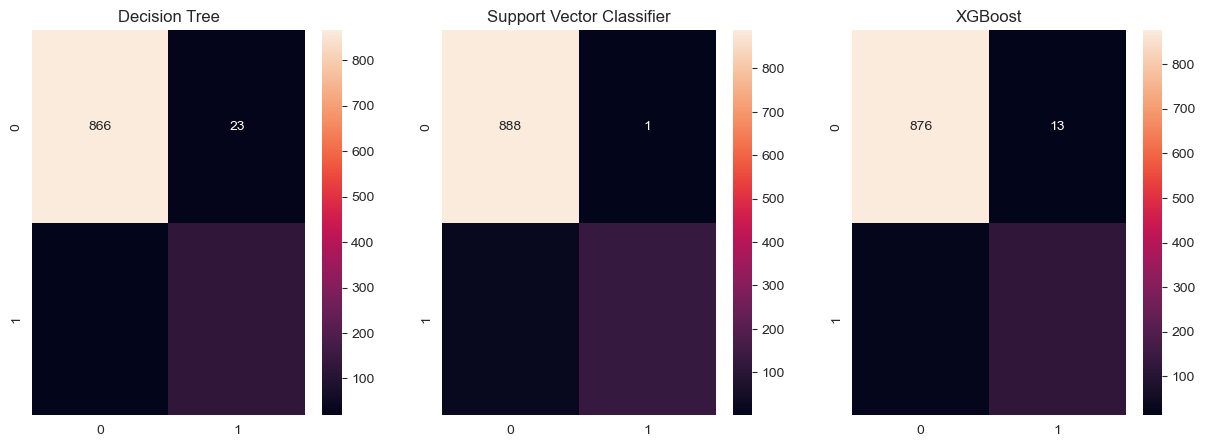

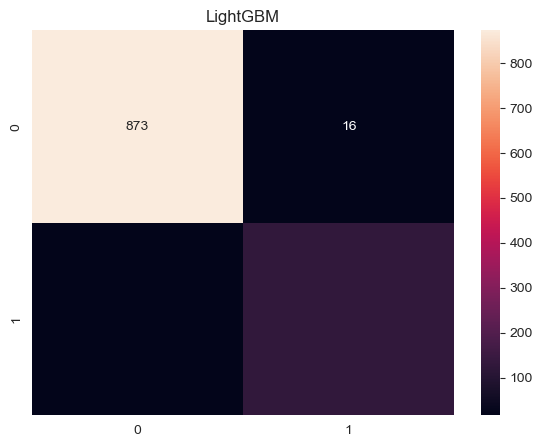

In [80]:
cnf_lr = confusion_matrix(y_test,y_pred_test_lr)
cnf_cnb = confusion_matrix(y_test,y_pred_test_cnb)
cnf_rf = confusion_matrix(y_test,y_pred_test_rf)
cnf_dt = confusion_matrix(y_test,y_pred_test_dt)
cnf_svc = confusion_matrix(y_test,y_pred_test_svc)
cnf_xgb = confusion_matrix(y_test,y_pred_test_xgb)
cnf_lgbm = confusion_matrix(y_test,y_pred_test_lgbm)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.heatmap(cnf_lr,annot=True,fmt="d")
plt.title("Logistic Regression")
plt.subplot(1,3,2)
sns.heatmap(cnf_cnb,annot=True,fmt="d")
plt.title("Complement Naive Bayes")
plt.subplot(1,3,3)
sns.heatmap(cnf_rf,annot=True,fmt="d")
plt.title("Random Forest")

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.heatmap(cnf_dt,annot=True,fmt="d")
plt.title("Decision Tree")
plt.subplot(1,3,2)
sns.heatmap(cnf_svc,annot=True,fmt="d")
plt.title("Support Vector Classifier")
plt.subplot(1,3,3)
sns.heatmap(cnf_xgb,annot=True,fmt="d")
plt.title("XGBoost")

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.heatmap(cnf_lgbm,annot=True,fmt="d")
plt.title("LightGBM")

Test

In [2]:
input1 =''' Hi, I am a student of Alliance University. I am writing this mail to inform you that I have been selected for the internship at Bharat Intern. I am very excited to work with you.'''
input2 = '''hello i am zahid'''
input = clean_text(input1)
# input = clean_text(input2)
print(input)
input = vectorizer.transform([input])
print(le.inverse_transform(rf.predict(input)))

NameError: name 'clean_text' is not defined